In [1]:
import pandas as pd
import json
import glob

In [2]:
import re

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import sys
import os

# Adjust the path to your project root folder
project_root = os.path.abspath(
    os.path.join("..")
)  # from notebooks/ up one level

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.data_loading.data_loading.data_loader import load_data_from_json
from src.data_loading.preprocessing.preprocessing import preprocess_df


df_raw = load_data_from_json("../data/parsed_json/*.json")
df_clean = preprocess_df(df_raw)
df_clean
df = df_clean.copy()

In [5]:
df

,price,address,neighborhood,status,size,bedrooms,energy_label,contribution,year_of_construction,roof_type,...,num_facilities,num_parcels,parcels_concat,ownership_type,charges_summary,postal_code_clean,city,inhabitants_in_neighborhood,families_with_children_pct,price_per_m2_neighborhood
0,€ 435.000 k.k.,Baarsstraat 35-1,Schinkelbuurt-Zuid,N/A,48 m²,1,D,"€ 254,00 per maand",1915,N/A,...,1,1,AMSTERDAM AC 1329,Gemeentelijk eigendom belast met erfpacht,Afgekocht tot 31-10-2061; Afgekocht tot 31-10-...,1075 RV,Amsterdam,1485.0,0.15,8962.0
1,€ 220.000 k.k.,Baden Powellweg 263-B17,Zuidwestkwadrant-Zuid,Verkocht,26 m²,1,F,N/A,1965,N/A,...,4,0,,Gemeentelijk eigendom belast met erfpacht (ein...,"€ 105,40 per jaar",1069 LH,Amsterdam,6175.0,0.33,4859.0
2,€ 375.000 k.k.,Spanderswoudstraat 14,Werengouw-Zuid,N/A,89 m²,3,D,"€ 158,51 per maand",1968,Plat dak bedekt met bitumineuze dakbedekking,...,2,1,AMSTERDAM AL 3690,Gemeentelijk eigendom belast met erfpacht,Afgekocht tot 15-12-2052,1024 LD,Amsterdam,1590.0,0.52,NaN
3,€ 1.150.000 k.k.,Admiraal De Ruijterweg 379-H,Bosleeuw,N/A,172 m²,2,A+,N/A,1922,Plat dak bedekt met bitumineuze dakbedekking,...,1,0,,Gemeentelijke erfpacht,Eeuwigdurend afgekocht,1055 MB,Amsterdam,5480.0,0.26,7355.0
4,€ 350.000 k.k.,John Motleyhof 15-2,Jacob Geelbuurt,N/A,49 m²,1,N/A,"€ 160,44 per maand",1956,N/A,...,1,0,,Erfpacht,Eeuwigdurend afgekocht,1065 XP,Amsterdam,3115.0,0.38,6154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,€ 575.000 k.k.,Derkinderenstraat 122,Overtoomse Veld-Noord,N/A,86 m²,3,A,"€ 262,00 per maand",2006,Plat dak,...,3,0,,Gemeentelijk eigendom belast met erfpacht (ein...,Afgekocht tot 15-12-2055; Afgekocht tot 15-12-...,1061 VX,Amsterdam,6025.0,0.40,6266.0
997,€ 1.300.000 k.k.,Prinsengracht 1033-C,Vijzelstraatbuurt,N/A,119 m²,2,N/A,"€ 320,00 per maand",1680,Samengesteld dak,...,4,1,AMSTERDAM A 9953,Volle eigendom,,1017 KP,Amsterdam,1410.0,0.14,9483.0
998,€ 540.000 v.o.n.,SPOT Amsterdam | Crystal (Bouwnr. 52),Amstel III deel A/B-Noord,N/A,81 m²,2,N/A,N/A,2022,Plat dak bedekt met bitumineuze dakbedekking,...,4,0,,,,1101 DA,Amsterdam,NaN,NaN,NaN
999,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,1,0,,,,N/A,<NA>,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        1001 non-null   object 
 1   address                      1001 non-null   object 
 2   neighborhood                 1001 non-null   object 
 3   status                       1001 non-null   object 
 4   size                         1001 non-null   object 
 5   bedrooms                     1001 non-null   object 
 6   energy_label                 1001 non-null   object 
 7   contribution                 1001 non-null   object 
 8   year_of_construction         1001 non-null   object 
 9   roof_type                    1001 non-null   object 
 10  living_area                  1001 non-null   object 
 11  external_storage             1001 non-null   object 
 12  balcony                      1001 non-null   object 
 13  nr_rooms          

In [7]:
df.replace("N/A", pd.NA, inplace=True)

In [8]:
df["bedrooms_num"] = pd.to_numeric(df["bedrooms"], errors="coerce")
df["nr_rooms_num"] = pd.to_numeric(df["nr_rooms"], errors="coerce")
df["bathrooms_num"] = pd.to_numeric(df["bathrooms"], errors="coerce")
df["year_of_construction_num"] = pd.to_numeric(
    df["year_of_construction"], errors="coerce"
)

df[
    [
        "price_num",
        "size_num",
        "bedrooms_num",
        "nr_rooms_num",
        "bathrooms_num",
        "year_of_construction_num",
    ]
].describe()

,price_num,size_num,bedrooms_num,nr_rooms_num,bathrooms_num,year_of_construction_num
count,9.180000e+02,918.000000,905.000000,918.000000,855.000000,869.000000
mean,7.819778e+05,94.139434,2.172376,3.343137,1.171930,1949.096663
std,6.057535e+05,49.878218,0.937841,1.275946,0.451028,76.773650
min,2.200000e+05,20.000000,1.000000,1.000000,1.000000,1600.000000
25%,4.500000e+05,63.000000,2.000000,3.000000,1.000000,1913.000000
50%,5.850000e+05,82.000000,2.000000,3.000000,1.000000,1966.000000
75%,8.750000e+05,109.000000,3.000000,4.000000,1.000000,2008.000000
max,5.475000e+06,380.000000,7.000000,12.000000,4.000000,2025.000000


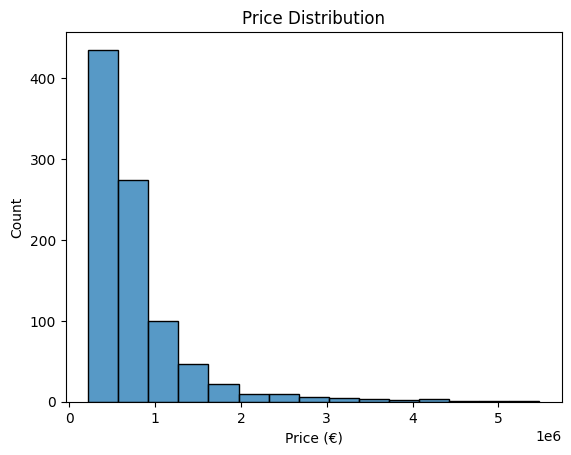

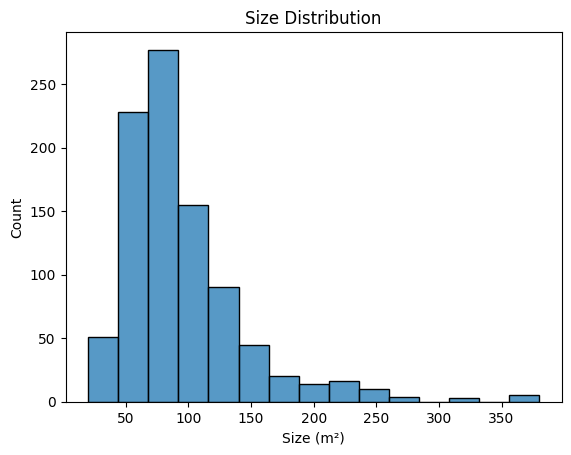

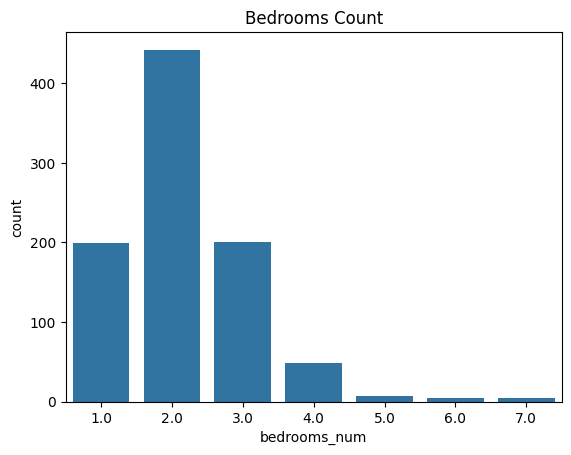

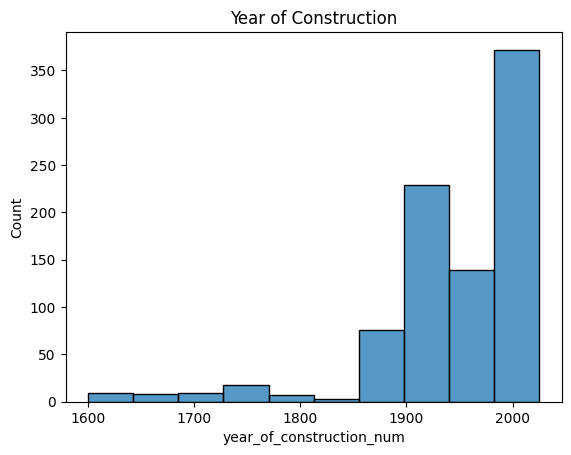

In [9]:
# Price Distribution
sns.histplot(df["price_num"].dropna(), bins=15)
plt.title("Price Distribution")
plt.xlabel("Price (€)")
plt.show()

# Size Distribution
sns.histplot(df["size_num"].dropna(), bins=15)
plt.title("Size Distribution")
plt.xlabel("Size (m²)")
plt.show()

# Bedrooms Count
sns.countplot(x="bedrooms_num", data=df)
plt.title("Bedrooms Count")
plt.show()

# Year of construction histogram
sns.histplot(df["year_of_construction_num"].dropna(), bins=10)
plt.title("Year of Construction")
plt.show()

In [10]:
# Neighborhood Counts
print(df["neighborhood"].value_counts())
# Energy label counts
print(df["energy_label"].value_counts())

neighborhood
Amstel III deel A/B-Noord    51
Zuidas-Zuid                  17
Elandsgrachtbuurt            16
Houthavens-West              14
Gelderlandpleinbuurt         12
                             ..
Vondelparkbuurt-West          1
Houthavens-Oost               1
Louis Couperusbuurt           1
Elzenhagen-Noord              1
Van der Pekbuurt              1
Name: count, Length: 271, dtype: int64
energy_label
A        218
C        173
B        113
D         87
A+        62
A++       35
E         32
A+++      21
G         14
F         12
A++++      2
Name: count, dtype: int64


In [11]:
# Facilities unique values (might be comma separated string)
print(df["facilities"].dropna().head())

# Missing values
print(df.isna().sum())

1    Glasvezelkabel, lift, mechanische ventilatie, ...
2                   Natuurlijke ventilatie en TV kabel
3                                     Balansventilatie
4                               Natuurlijke ventilatie
5                                     Lift en TV kabel
Name: facilities, dtype: object
price                         83
address                       83
neighborhood                  83
status                       776
size                          83
                            ... 
price_per_m2_neighborhood    182
bedrooms_num                  96
nr_rooms_num                  83
bathrooms_num                146
year_of_construction_num     132
Length: 64, dtype: int64


#### 0. Missing values

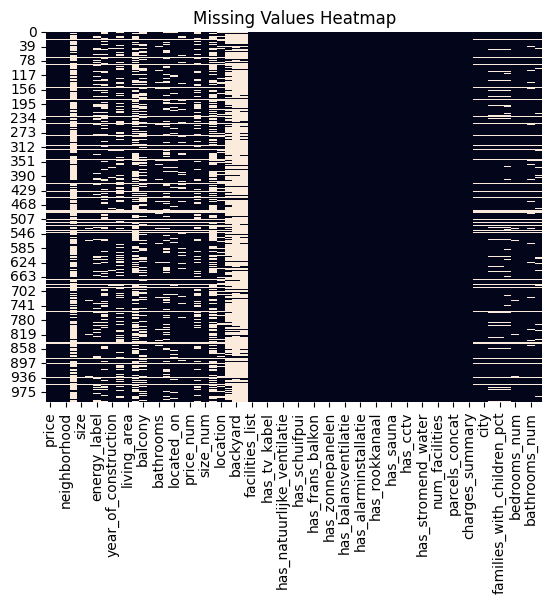

backyard                925
garden_location         885
status                  776
garden                  767
external_storage_num    562
                       ... 
ownership_type            0
has_satellietschotel      0
num_facilities            0
has_stromend_water        0
num_parcels               0
Length: 64, dtype: int64


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

print(df.isna().sum().sort_values(ascending=False))


#### 1. Correlation Analysis of Numeric Features


In [13]:
df.corr(numeric_only=True)["price_num"].sort_values(ascending=False)

price_num                      1.000000
size_num                       0.889541
bathrooms_num                  0.711309
nr_rooms_num                   0.614223
bedrooms_num                   0.527953
price_per_m2_neighborhood      0.418979
has_airconditioning            0.408908
contribution_vve_num           0.399557
has_domotica                   0.383214
has_alarminstallatie           0.348542
has_sauna                      0.284987
num_parcels                    0.261141
num_facilities                 0.260620
has_buitenzonwering            0.259665
external_storage_num           0.258089
has_dakraam                    0.190611
has_rookkanaal                 0.169709
has_balansventilatie           0.167730
has_zonnecollectoren           0.108479
has_glasvezelkabel             0.086236
has_zonnepanelen               0.077777
has_mechanische_ventilatie     0.070841
has_rolluiken                  0.061604
has_stromend_water             0.057347
has_satellietschotel           0.055528


In [14]:
corr = df.corr(numeric_only=True)
print(corr.columns)

Index(['price_num', 'contribution_vve_num', 'size_num', 'external_storage_num',
       'has_mechanische_ventilatie', 'has_tv_kabel', 'has_lift',
       'has_natuurlijke_ventilatie', 'has_n/a', 'has_schuifpui',
       'has_glasvezelkabel', 'has_frans_balkon', 'has_buitenzonwering',
       'has_zonnepanelen', 'has_airconditioning', 'has_balansventilatie',
       'has_dakraam', 'has_alarminstallatie', 'has_domotica', 'has_rookkanaal',
       'has_elektra', 'has_sauna', 'has_zonnecollectoren', 'has_cctv',
       'has_rolluiken', 'has_stromend_water', 'has_satellietschotel',
       'num_facilities', 'num_parcels', 'inhabitants_in_neighborhood',
       'families_with_children_pct', 'price_per_m2_neighborhood',
       'bedrooms_num', 'nr_rooms_num', 'bathrooms_num',
       'year_of_construction_num'],
      dtype='object')


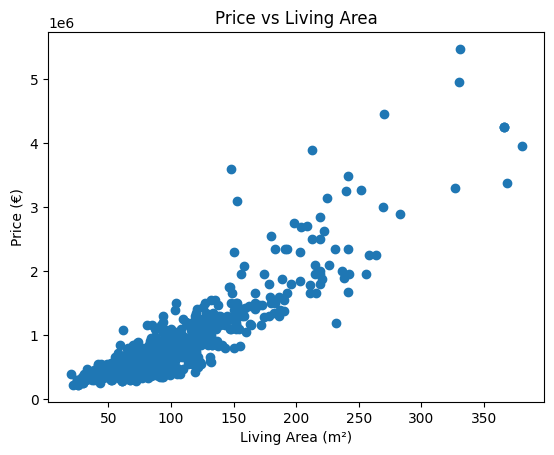

In [15]:
plt.scatter(df["size_num"], df["price_num"])
plt.xlabel("Living Area (m²)")
plt.ylabel("Price (€)")
plt.title("Price vs Living Area")
plt.show()


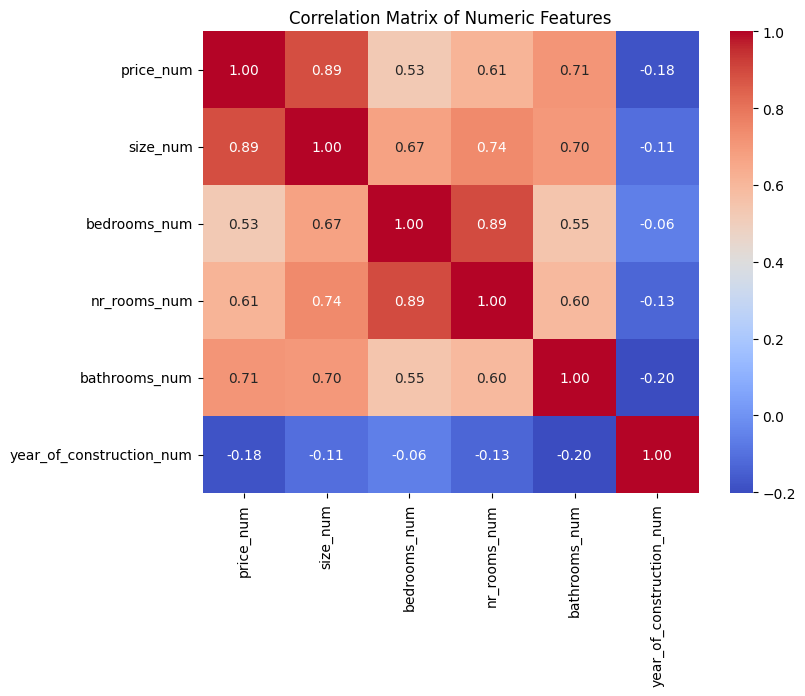

In [16]:
numeric_cols = [
    "price_num",
    "size_num",
    "bedrooms_num",
    "nr_rooms_num",
    "bathrooms_num",
    "year_of_construction_num",
]

corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

#### 2. Price per m² Calculation & Analysis

Derive price per m² from price and size, check its distribution and relation to neighborhood average


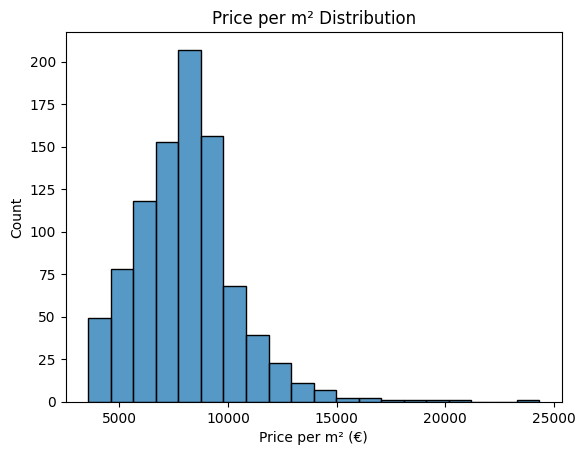

In [17]:
df["price_per_m2"] = df["price_num"] / df["size_num"]

sns.histplot(df["price_per_m2"].dropna(), bins=20)
plt.title("Price per m² Distribution")
plt.xlabel("Price per m² (€)")
plt.show()

In [18]:
df.columns

Index(['price', 'address', 'neighborhood', 'status', 'size', 'bedrooms',
       'energy_label', 'contribution', 'year_of_construction', 'roof_type',
       'living_area', 'external_storage', 'balcony', 'nr_rooms', 'bathrooms',
       'toilets', 'located_on', 'facilities', 'price_num',
       'contribution_vve_num', 'size_num', 'external_storage_num', 'location',
       'garden', 'backyard', 'garden_location', 'facilities_list',
       'has_mechanische_ventilatie', 'has_tv_kabel', 'has_lift',
       'has_natuurlijke_ventilatie', 'has_n/a', 'has_schuifpui',
       'has_glasvezelkabel', 'has_frans_balkon', 'has_buitenzonwering',
       'has_zonnepanelen', 'has_airconditioning', 'has_balansventilatie',
       'has_dakraam', 'has_alarminstallatie', 'has_domotica', 'has_rookkanaal',
       'has_elektra', 'has_sauna', 'has_zonnecollectoren', 'has_cctv',
       'has_rolluiken', 'has_stromend_water', 'has_satellietschotel',
       'num_facilities', 'num_parcels', 'parcels_concat', 'ownership_ty

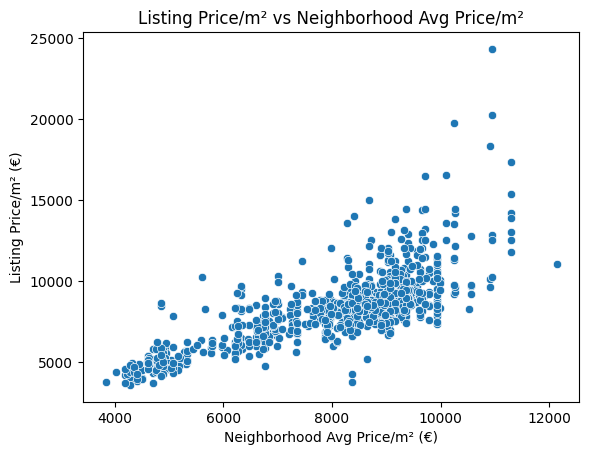

In [19]:
sns.scatterplot(x="price_per_m2_neighborhood", y="price_per_m2", data=df)
plt.title("Listing Price/m² vs Neighborhood Avg Price/m²")
plt.xlabel("Neighborhood Avg Price/m² (€)")
plt.ylabel("Listing Price/m² (€)")
plt.show()

#### 3. Outlier Detection in Price or Price per m²

Visualize and identify listings with suspiciously high or low prices


In [20]:
Q1 = df["price_num"].quantile(0.25)
Q3 = df["price_num"].quantile(0.75)

IQR = Q3 - Q1

outliers = df[
    (df["price_num"] < (Q1 - 1.5 * IQR)) | (df["price_num"] > (Q3 + 1.5 * IQR))
]

print(f"Found {len(outliers)} price outliers")
print(outliers[["address", "price_num"]])

Found 67 price outliers
                       address  price_num
32      Claude Debussylaan 199  1650000.0
41            Haparandaweg 706  1800000.0
56        Stadhouderskade 20-G  2295000.0
72       Gaasterlandstraat 228  1750000.0
77          Ceintuurbaan 253-3  1675000.0
..                         ...        ...
928        Willemsparkweg 46-A  2895000.0
938           Minervalaan 14-H  2625000.0
957         Lauriergracht 37-C  1600000.0
959  Pieter de Hoochstraat 9-A  4450000.0
985       Stadhouderskade 17-F  2100000.0

[67 rows x 2 columns]


#### 4. Feature Engineering: Extract Useful Info from Text

Example: Count number of facilities


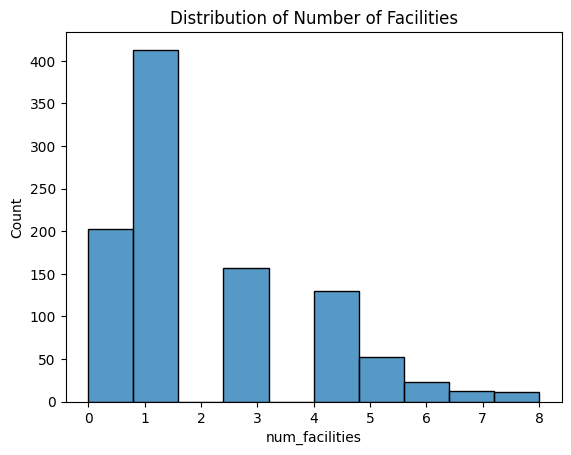

In [21]:
df["num_facilities"] = df["facilities"].apply(
    lambda x: len(x.split(",")) if pd.notna(x) else 0
)
sns.histplot(df["num_facilities"], bins=10)
plt.title("Distribution of Number of Facilities")
plt.show()

#### 5. Explore Missing Data Patterns


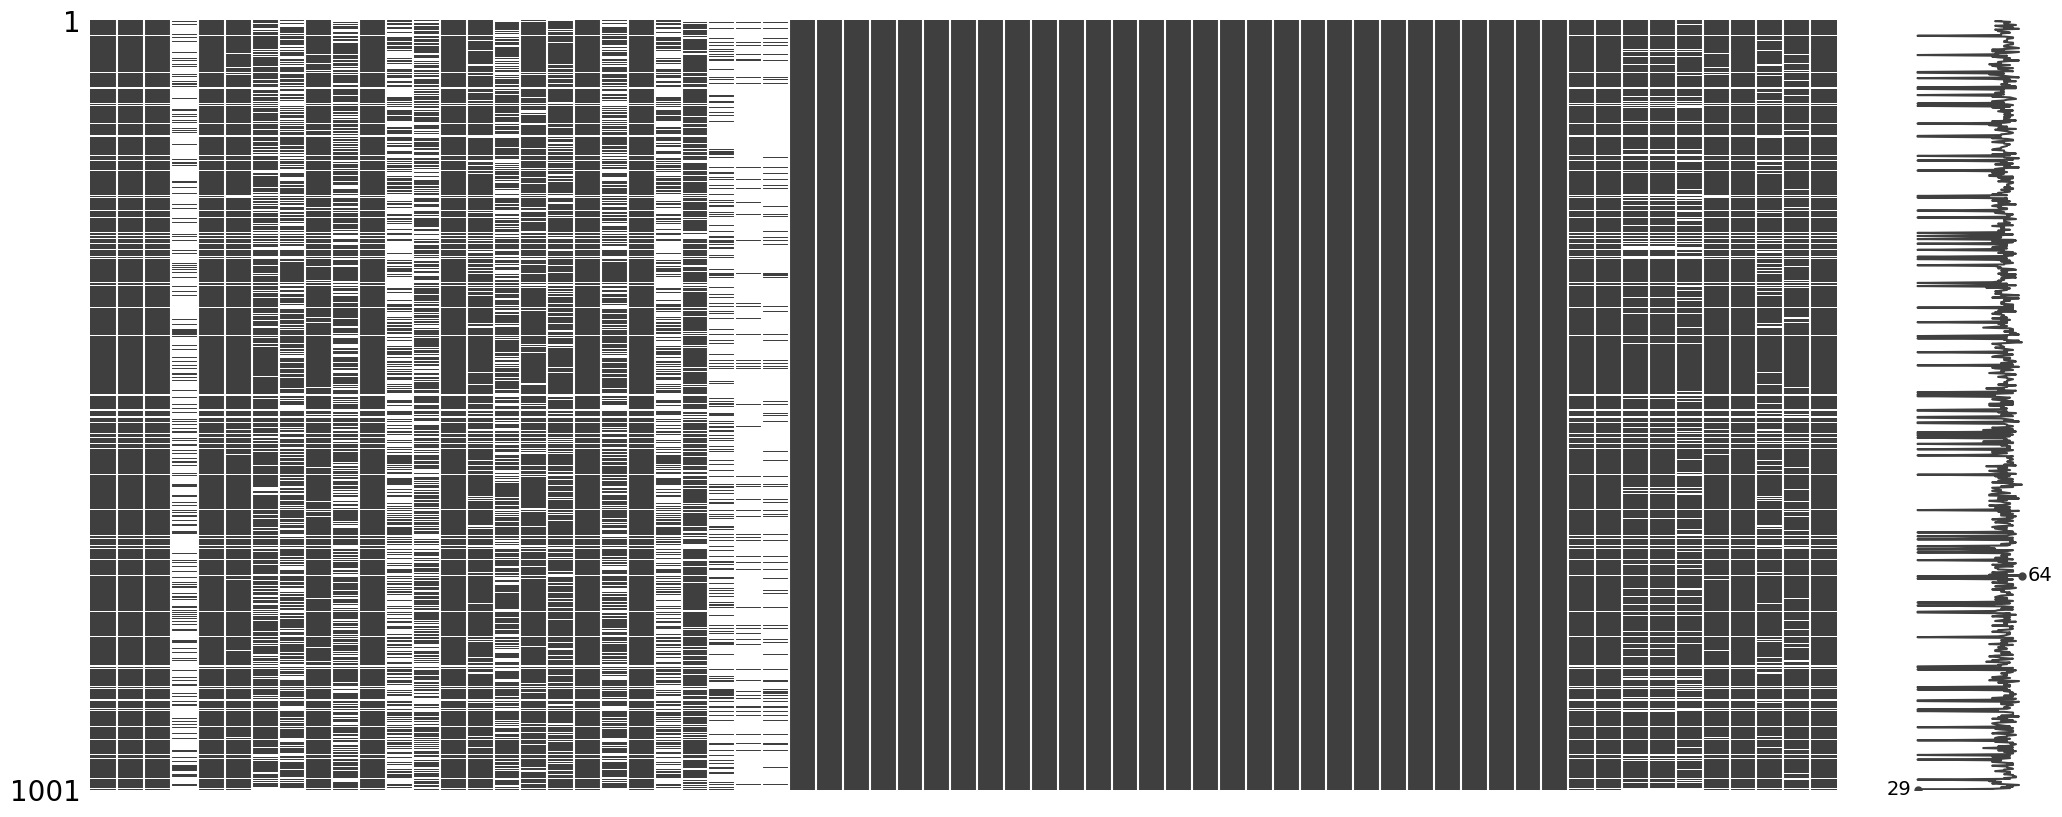

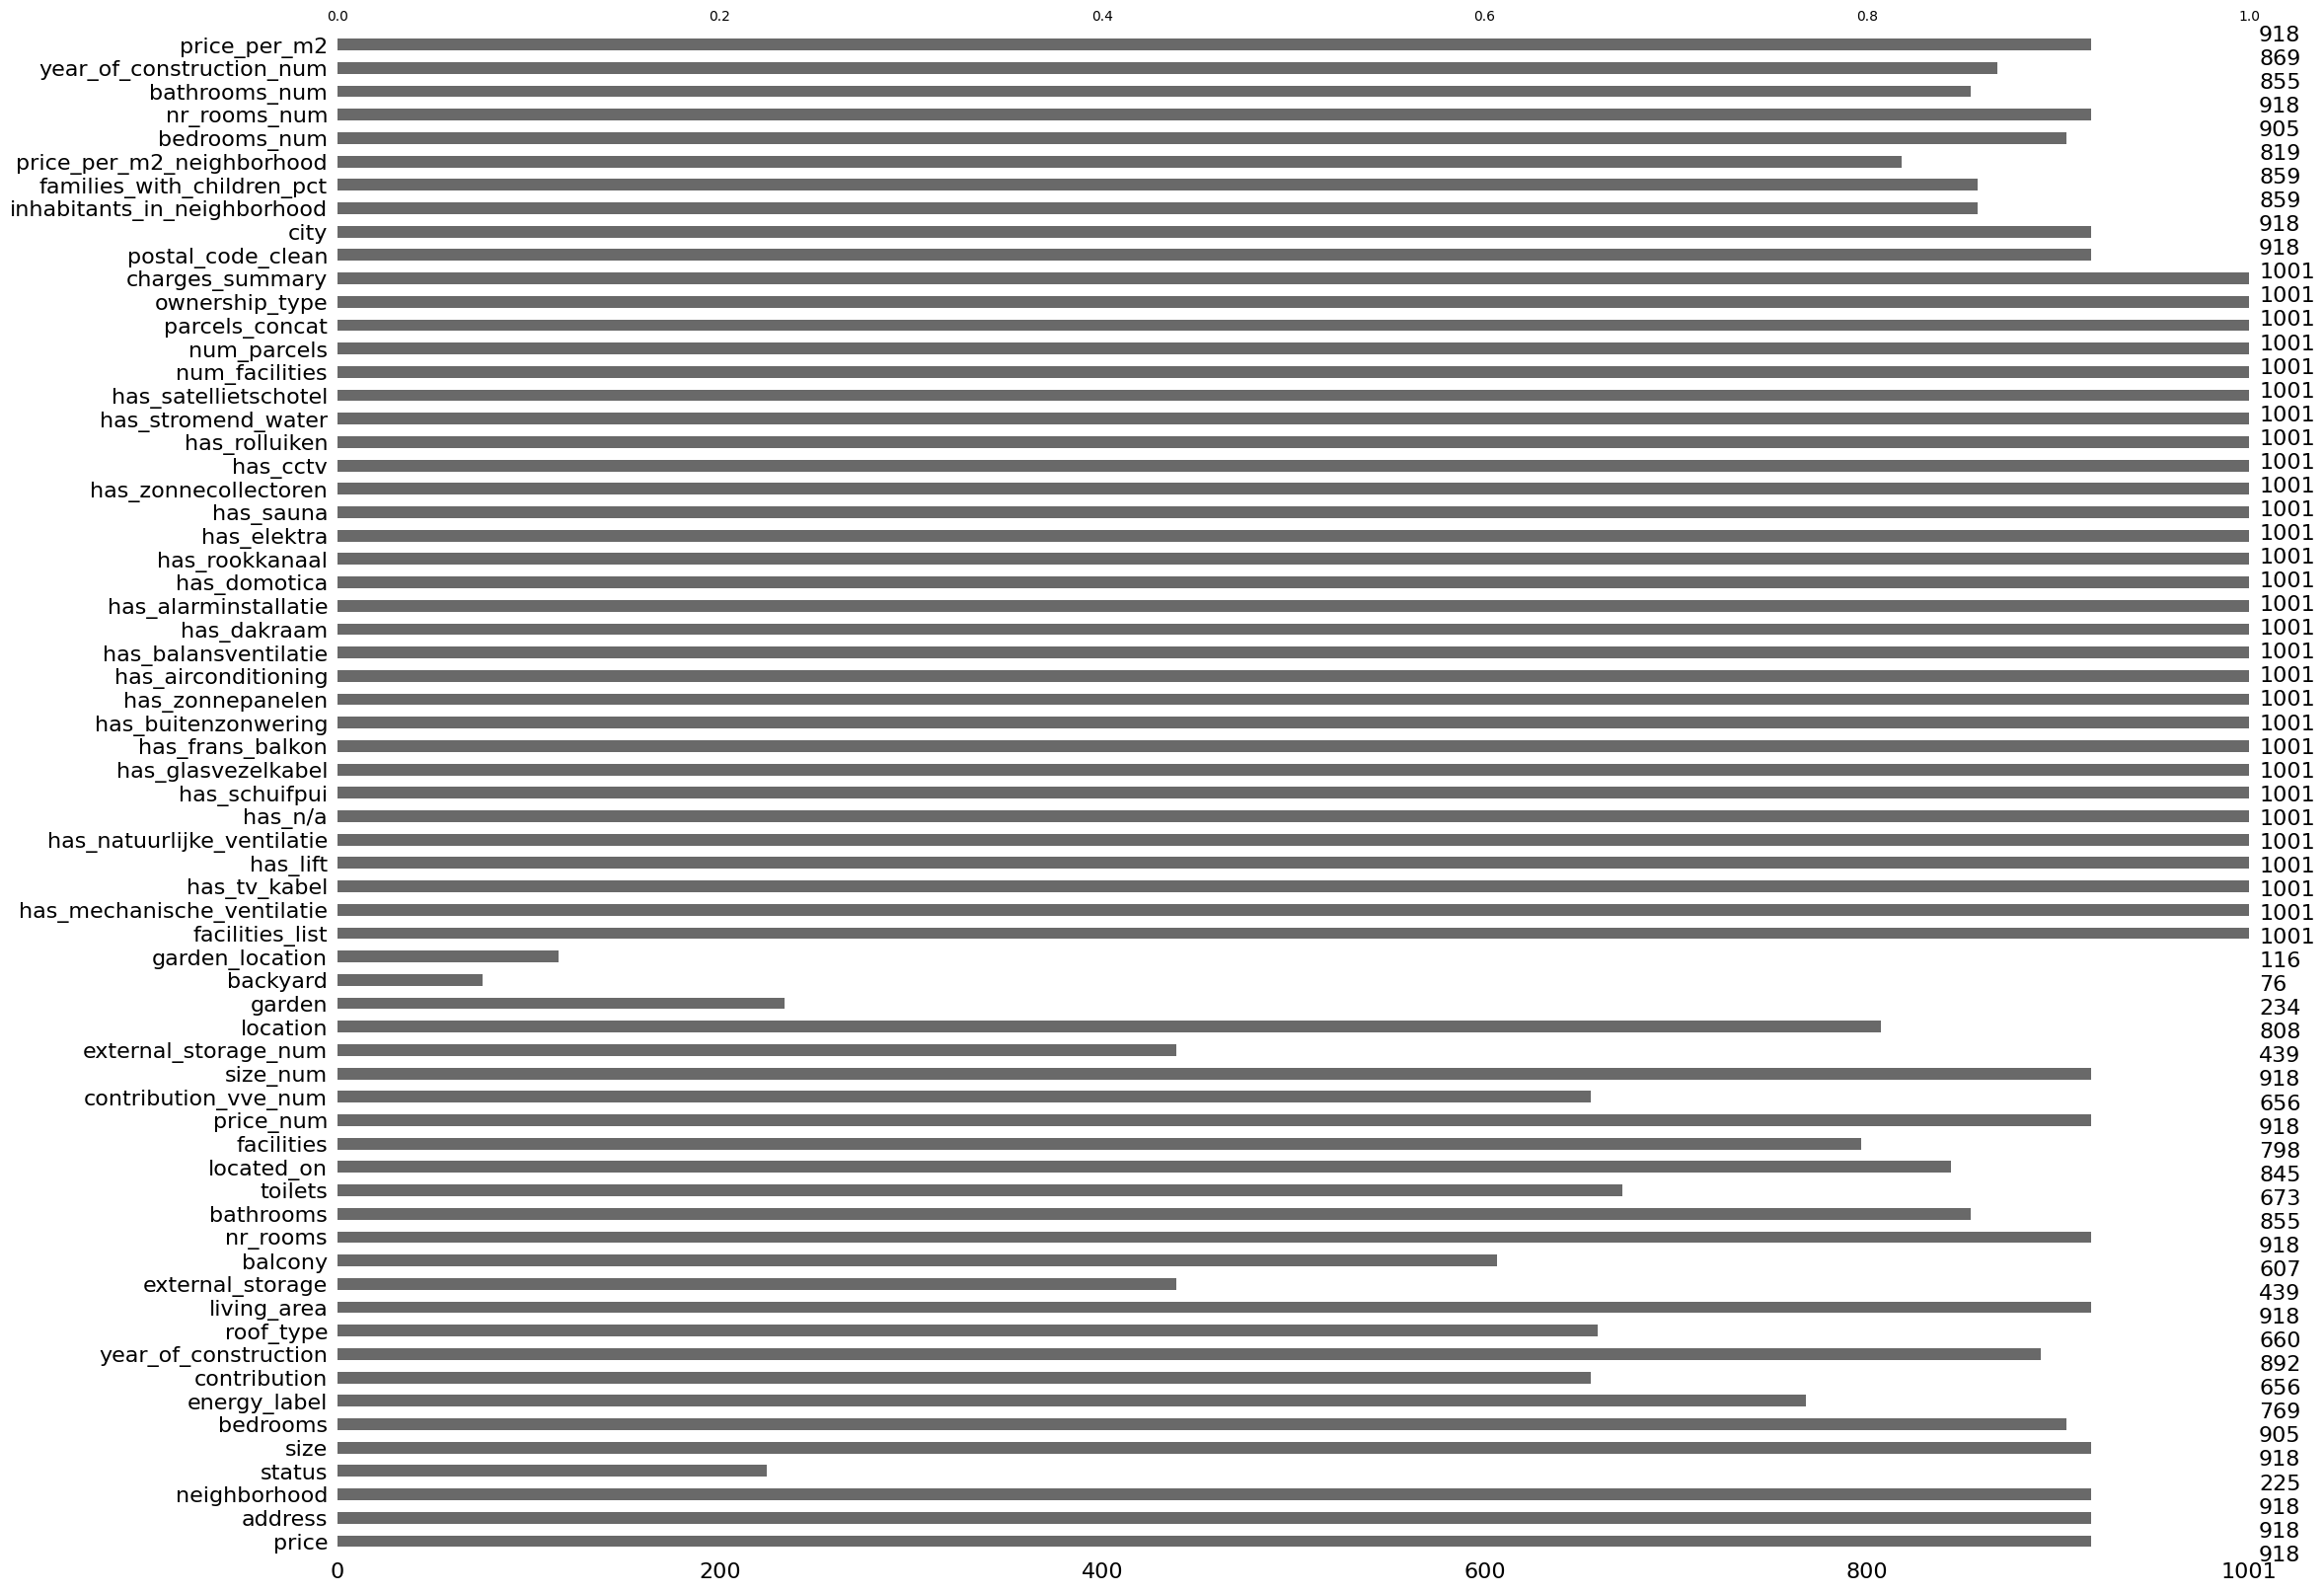

In [22]:
import missingno as msno

msno.matrix(df)
plt.show()

msno.bar(df)
plt.show()

#### 6. Categorical Analysis

Distribution of energy labels or balconies


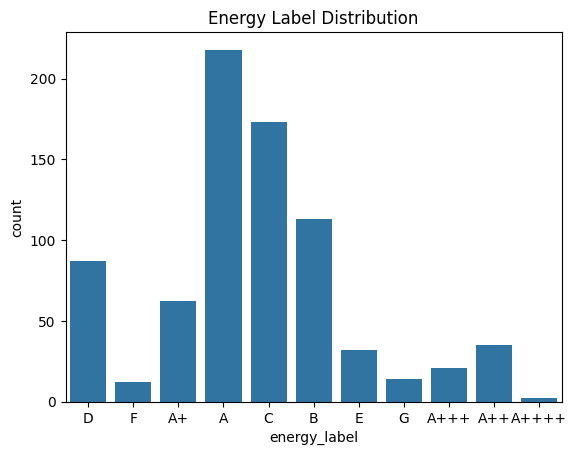

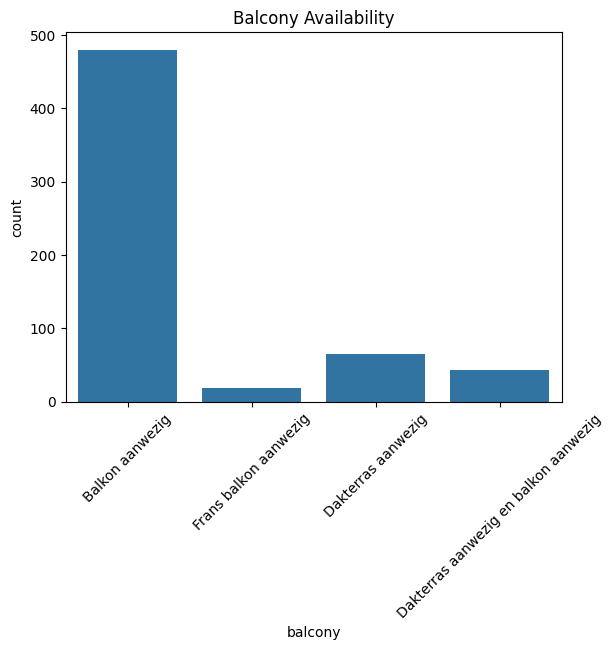

In [23]:
sns.countplot(x="energy_label", data=df)
plt.title("Energy Label Distribution")
plt.show()

sns.countplot(x="balcony", data=df)
plt.title("Balcony Availability")
plt.xticks(rotation=45)
plt.show()

In [24]:
df

,price,address,neighborhood,status,size,bedrooms,energy_label,contribution,year_of_construction,roof_type,...,postal_code_clean,city,inhabitants_in_neighborhood,families_with_children_pct,price_per_m2_neighborhood,bedrooms_num,nr_rooms_num,bathrooms_num,year_of_construction_num,price_per_m2
0,€ 435.000 k.k.,Baarsstraat 35-1,Schinkelbuurt-Zuid,<NA>,48 m²,1,D,"€ 254,00 per maand",1915,<NA>,...,1075 RV,Amsterdam,1485.0,0.15,8962.0,1.0,2.0,1.0,1915.0,9062.500000
1,€ 220.000 k.k.,Baden Powellweg 263-B17,Zuidwestkwadrant-Zuid,Verkocht,26 m²,1,F,<NA>,1965,<NA>,...,1069 LH,Amsterdam,6175.0,0.33,4859.0,1.0,1.0,1.0,1965.0,8461.538462
2,€ 375.000 k.k.,Spanderswoudstraat 14,Werengouw-Zuid,<NA>,89 m²,3,D,"€ 158,51 per maand",1968,Plat dak bedekt met bitumineuze dakbedekking,...,1024 LD,Amsterdam,1590.0,0.52,NaN,3.0,4.0,1.0,1968.0,4213.483146
3,€ 1.150.000 k.k.,Admiraal De Ruijterweg 379-H,Bosleeuw,<NA>,172 m²,2,A+,<NA>,1922,Plat dak bedekt met bitumineuze dakbedekking,...,1055 MB,Amsterdam,5480.0,0.26,7355.0,2.0,5.0,1.0,1922.0,6686.046512
4,€ 350.000 k.k.,John Motleyhof 15-2,Jacob Geelbuurt,<NA>,49 m²,1,<NA>,"€ 160,44 per maand",1956,<NA>,...,1065 XP,Amsterdam,3115.0,0.38,6154.0,1.0,3.0,1.0,1956.0,7142.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,€ 575.000 k.k.,Derkinderenstraat 122,Overtoomse Veld-Noord,<NA>,86 m²,3,A,"€ 262,00 per maand",2006,Plat dak,...,1061 VX,Amsterdam,6025.0,0.40,6266.0,3.0,4.0,1.0,2006.0,6686.046512
997,€ 1.300.000 k.k.,Prinsengracht 1033-C,Vijzelstraatbuurt,<NA>,119 m²,2,<NA>,"€ 320,00 per maand",1680,Samengesteld dak,...,1017 KP,Amsterdam,1410.0,0.14,9483.0,2.0,5.0,1.0,1680.0,10924.369748
998,€ 540.000 v.o.n.,SPOT Amsterdam | Crystal (Bouwnr. 52),Amstel III deel A/B-Noord,<NA>,81 m²,2,<NA>,<NA>,2022,Plat dak bedekt met bitumineuze dakbedekking,...,1101 DA,Amsterdam,NaN,NaN,NaN,2.0,3.0,1.0,2022.0,6666.666667
999,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
